# analysis

In [86]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from PIL import Image
from functions import *

In [87]:
np.load('avg3x3.npy')

array([28.19772275, 25.90491147, 27.45925034, ..., 25.07286157,
       25.03499243, 25.93965764])

In [98]:
df = pd.DataFrame(columns=['x','y','value','avg3x3','std3x3','label'])
df['x']         = np.load('x.npy')
df['y']         = np.load('y.npy')
df['value']     = np.load('value.npy')
df['avg3x3']    = np.load('avg3x3.npy')
df['std3x3']    = np.load('std3x3.npy')
df['s3/a3']     = df['std3x3']/df['avg3x3']
df['v-a3/a3']   = (df['value']-df['avg3x3'])/df['avg3x3']
df['label']     = np.load('label.npy')*1
df.dropna(inplace=True)

df = df[[column for column in df.columns if column!='label'] + ['label']]
df.head()

,x,y,value,avg3x3,std3x3,s3/a3,v-a3/a3,label
0,11102,572,26.870829,28.197723,2.053014,0.072808,-0.047057,0
1,11105,572,24.463818,25.904911,2.339112,0.090296,-0.055630,0
2,11108,572,29.420080,27.459250,2.548500,0.092810,0.071409,0
3,11111,572,26.255697,28.115117,2.353569,0.083712,-0.066136,0
4,11114,572,28.455631,27.062207,2.673425,0.098788,0.051490,0


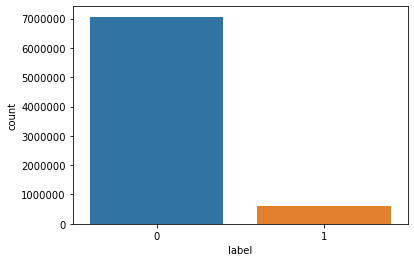

In [100]:
sns.countplot(df['label'])

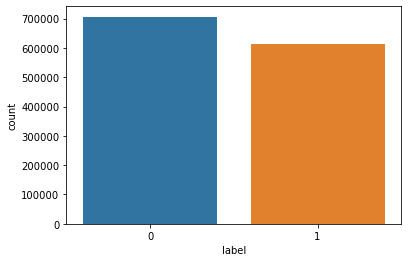

In [101]:
df.drop(df.query('label == 0').sample(frac=.9).index, inplace=True)
sns.countplot(df['label'])

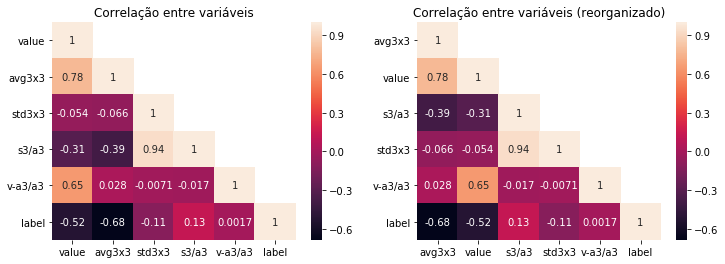

In [108]:
corr = df[[ column for column in df.columns if column not in ['x','y','label'] ]+['label']].corr()
orgcorr = df[['avg3x3','value','s3/a3','std3x3','v-a3/a3','label']].corr()


fig, axes = plt.subplots(1,2,figsize=(12,4))

mask = np.triu(np.ones_like(corr, dtype=np.bool),1)

axes[0].set_title('Correlação entre variáveis')
axes[1].set_title('Correlação entre variáveis (reorganizado)')

sns.heatmap(corr,    annot=True, mask=mask, ax=axes[0],fmt='.2g')
sns.heatmap(orgcorr, annot=True, mask=mask, ax=axes[1],fmt='.2g')

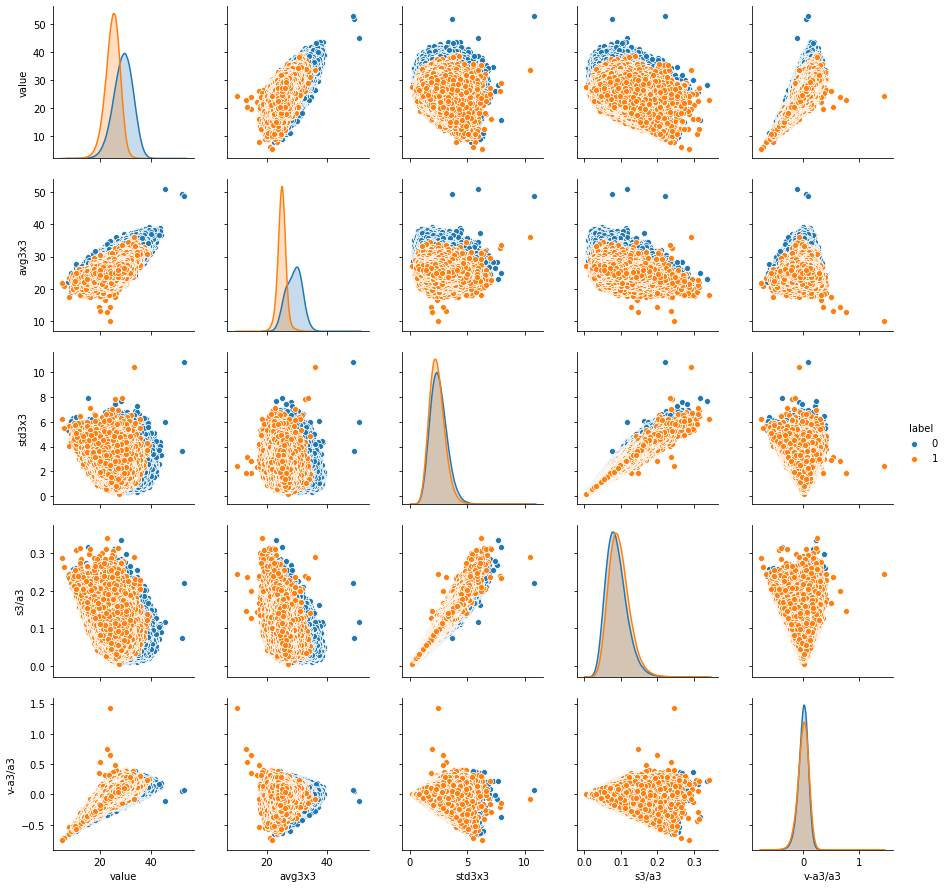

In [110]:
sns.pairplot(df, hue='label', vars=[ col for col in df.columns if col not in ['x','y','label'] ])

We definitely won't make use of v-a3/a3. Also, we will only use std or std/avg, depend on who make results better.

It is important to see if removing value or avg gives the same result.

In [139]:
#using std/avg

X = df[[ column for column in df.columns if column not in ['x','y','label', 'v-a3/a3','s3/a3'] ]]
y = df['label']

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))

print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           175109            36393
Actually False           21294           163411
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    211502
           1       0.82      0.88      0.85    184705

    accuracy                           0.85    396207
   macro avg       0.85      0.86      0.85    396207
weighted avg       0.86      0.85      0.85    396207



In [140]:
#using std (não usando v-a3/a3)

X = df[[ column for column in df.columns if column not in ['x','y','label', 'v-a3/a3','std3x3'] ]]
y = df['label']

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))

print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           175157            36438
Actually False           21266           163346
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    211595
           1       0.82      0.88      0.85    184612

    accuracy                           0.85    396207
   macro avg       0.85      0.86      0.85    396207
weighted avg       0.86      0.85      0.85    396207



In [141]:
#leaving value (using std)


X = df[[ column for column in df.columns if column not in ['x','y','label', 'value', 'v-a3/a3','s3/a3'] ]]
y = df['label']

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))

print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           175226            36671
Actually False           21355           162955
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    211897
           1       0.82      0.88      0.85    184310

    accuracy                           0.85    396207
   macro avg       0.85      0.86      0.85    396207
weighted avg       0.86      0.85      0.85    396207



In [142]:
#leaving avg (using std)


X = df[[ column for column in df.columns if column not in ['x','y','label', 'avg3x3', 'v-a3/a3','s3/a3'] ]]
y = df['label']

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))

print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           160139            51703
Actually False           51593           132772
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    211842
           1       0.72      0.72      0.72    184365

    accuracy                           0.74    396207
   macro avg       0.74      0.74      0.74    396207
weighted avg       0.74      0.74      0.74    396207



Therefore, 'average3x3' and 's3/a3' are the only variables to be used for segmentation process.

In [158]:
X = df[['avg3x3','s3/a3']]
y = df['label']

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred = logmodel.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))

print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           174855            36569
Actually False           21109           163674
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    211424
           1       0.82      0.89      0.85    184783

    accuracy                           0.85    396207
   macro avg       0.85      0.86      0.85    396207
weighted avg       0.86      0.85      0.85    396207



In [159]:
from pickle import dumps, loads
text_model = dumps(logmodel)

**text model**

```
b'\x80\x04\x95\xbb\x02\x00\x00\x00\x00\x00\x00\x8c\x1esklearn.linear_model._logistic\x94\x8c\x12LogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x07penalty\x94\x8c\x02l2\x94\x8c\x04dual\x94\x89\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\rfit_intercept\x94\x88\x8c\x11intercept_scaling\x94K\x01\x8c\x0cclass_weight\x94N\x8c\x0crandom_state\x94N\x8c\x06solver\x94\x8c\x05lbfgs\x94\x8c\x08max_iter\x94Kd\x8c\x0bmulti_class\x94\x8c\x04auto\x94\x8c\x07verbose\x94K\x00\x8c\nwarm_start\x94\x89\x8c\x06n_jobs\x94N\x8c\x08l1_ratio\x94N\x8c\x08classes_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h\x1b\x8c\x05dtype\x94\x93\x94\x8c\x02i8\x94K\x00K\x01\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x94t\x94b\x8c\x05coef_\x94h\x1ah\x1dK\x00\x85\x94h\x1f\x87\x94R\x94(K\x01K\x01K\x02\x86\x94h$\x8c\x02f8\x94K\x00K\x01\x87\x94R\x94(K\x03h(NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x10\xfe\\\xf5\x05_#\xf1\xbf\xe9\x7ft\xe4\x19\xf75\xc0\x94t\x94b\x8c\nintercept_\x94h\x1ah\x1dK\x00\x85\x94h\x1f\x87\x94R\x94(K\x01K\x01\x85\x94h3\x89C\x08(\xc7j\xa3\xdfp>@\x94t\x94b\x8c\x07n_iter_\x94h\x1ah\x1dK\x00\x85\x94h\x1f\x87\x94R\x94(K\x01K\x01\x85\x94h$\x8c\x02i4\x94K\x00K\x01\x87\x94R\x94(K\x03h(NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x04+\x00\x00\x00\x94t\x94b\x8c\x10_sklearn_version\x94\x8c\x040.22\x94ub.'
```

In [163]:
from pickle import dumps, loads
logmodel = loads(text_model)

y_pred = logmodel.predict(X_test)

print(pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                   index=['Actually True','Actually False'],
                   columns=['Predicted True','Predicted False']))
print(classification_report(y_test, y_pred))

                Predicted True  Predicted False
Actually True           174855            36569
Actually False           21109           163674
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    211424
           1       0.82      0.89      0.85    184783

    accuracy                           0.85    396207
   macro avg       0.85      0.86      0.85    396207
weighted avg       0.86      0.85      0.85    396207

